In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,shutil
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import copy, cv2,glob

# Start


In [6]:
class mC(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99):
            self.model.stop_training = True

callbacks = mC()

In [7]:
lz = 'tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(lz, 'r')
zip_ref.extractall('tmp')
zip_ref.close()

In [8]:
base_dir = 'tmp/rockpaperscissors'
t_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')
roc_dir = os.path.join(base_dir,'rock')
pa_dir = os.path.join(base_dir,'paper')
sci_dir = os.path.join(base_dir,'scissors')

In [9]:
os.mkdir(t_dir)
os.mkdir(val_dir)

In [10]:
tr = os.path.join(t_dir, 'rock')
tp = os.path.join(t_dir, 'paper')
ts = os.path.join(t_dir, 'scissors')
vr = os.path.join(val_dir, 'rock')
vp = os.path.join(val_dir, 'paper')
vs = os.path.join(val_dir, 'scissors')

In [11]:
os.mkdir(tr)
os.mkdir(tp)
os.mkdir(ts)
os.mkdir(vr)
os.mkdir(vp)
os.mkdir(vs)

In [12]:
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pa_dir, val_pa_dir = train_test_split(os.listdir(pa_dir), test_size = 0.40)

In [13]:
for file in train_roc_dir:
    shutil.copy(os.path.join(roc_dir, file), os.path.join(tr, file))
for file in val_roc_dir:
    shutil.copy(os.path.join(roc_dir, file), os.path.join(vr,file))
    
for file in train_pa_dir:
    shutil.copy(os.path.join(pa_dir,file), os.path.join(tp,file))
for file in val_pa_dir:
    shutil.copy(os.path.join(pa_dir,file), os.path.join(vp,file))

for file in train_sci_dir:
    shutil.copy(os.path.join(sci_dir,file), os.path.join(ts,file))
for file in val_sci_dir:
    shutil.copy(os.path.join(sci_dir,file), os.path.join(vs,file))

In [14]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.35,
    fill_mode = 'nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.35,
    fill_mode = 'nearest'
)

In [15]:
train_generator = train_datagen.flow_from_directory(
    t_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       36992     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, 
    epochs = 30,
    validation_data = val_generator,
    validation_steps = 27, 
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/30
41/41 - 27s - loss: 1.0835 - accuracy: 0.4992 - val_loss: 0.7456 - val_accuracy: 0.6076
Epoch 2/30
41/41 - 27s - loss: 0.5144 - accuracy: 0.8201 - val_loss: 0.4657 - val_accuracy: 0.8171
Epoch 3/30
41/41 - 28s - loss: 0.2904 - accuracy: 0.8941 - val_loss: 0.2869 - val_accuracy: 0.9028
Epoch 4/30
41/41 - 28s - loss: 0.2002 - accuracy: 0.9322 - val_loss: 0.2182 - val_accuracy: 0.9236
Epoch 5/30
41/41 - 28s - loss: 0.1938 - accuracy: 0.9398 - val_loss: 0.1736 - val_accuracy: 0.9479
Epoch 6/30
41/41 - 27s - loss: 0.1439 - accuracy: 0.9436 - val_loss: 0.1712 - val_accuracy: 0.9456
Epoch 7/30
41/41 - 27s - loss: 0.1275 - accuracy: 0.9535 - val_loss: 0.1474 - val_accuracy: 0.9630
Epoch 8/30
41/41 - 28s - loss: 0.0931 - accuracy: 0.9703 - val_loss: 0.1115 - val_accuracy: 0.9711
Epoch 9/30
41/41 - 28s - loss: 0.0804 - accuracy: 0.9748 - val_loss: 0.1194 - val_accuracy: 0.9676
Epoch 10/30
41/41 - 27s - loss: 0.0918 - accuracy: 0.9718 - val_loss: 0.1974 - val_accuracy: 0.9352
Epoch 11/

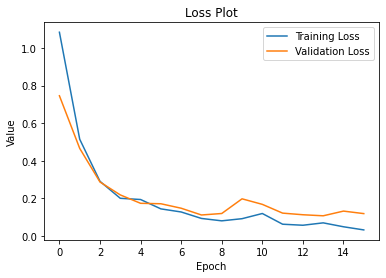

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

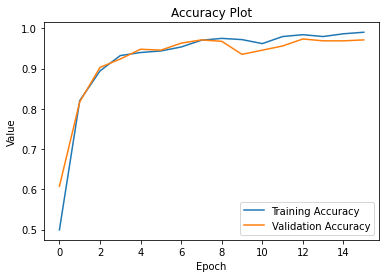

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

tmp/rockpaperscissors/rock/rtyjzSfCZlfTPTox.png
rock


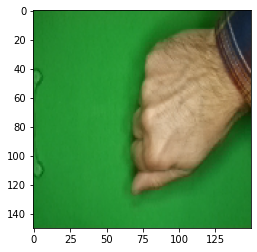

In [28]:
uploaded = "tmp/rockpaperscissors/rock/rtyjzSfCZlfTPTox.png"

face_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


    
    
for fn in glob.glob(uploaded):
    path = fn 
    img = image.load_img(path, target_size =(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0,0]!=0:
        print('paper')
    elif classes[0,1]!=0:
        print('rock')
    else:
        print('scissors')
    imgplot = plt.imshow(img)